# AoC Day 10 part 1

- https://adventofcode.com/2024/day/10

- https://adventofcode.com/2024/day/10/input

In [1]:
!pip install pyvis

In [2]:
import networkx as nx 
from pyvis.network import Network 

## Example

In [3]:
# Build the map 

island_map_input = '''
89010123
78121874
87430965
96549874
45678903
32019012
01329801
10456732
'''

island_map = [ [int(j) for j in list(i)]  for i in island_map_input.split() ]

island_map

[[8, 9, 0, 1, 0, 1, 2, 3],
 [7, 8, 1, 2, 1, 8, 7, 4],
 [8, 7, 4, 3, 0, 9, 6, 5],
 [9, 6, 5, 4, 9, 8, 7, 4],
 [4, 5, 6, 7, 8, 9, 0, 3],
 [3, 2, 0, 1, 9, 0, 1, 2],
 [0, 1, 3, 2, 9, 8, 0, 1],
 [1, 0, 4, 5, 6, 7, 3, 2]]

In [4]:
# Build the graph/network
# For each position, check 4 nearby positions: up, right, down, left (no diagnal movement)
# - if the nearby position is next height, add as valid path to the graph
# Also as we go through the positions, note down all the trailheads (0s)

G = nx.DiGraph()
trailhead = list() 

for x in range(len(island_map[0])):
    for y in range(len(island_map)):
        src_node = island_map[y][x]
        
        if src_node == 0: trailhead.append( (x, y) )
        G.add_node(f'{x}_{y}', title=f'{x}_{y}', )
        
        if y > 0:
            tgt_node = island_map[y-1][x]
            if tgt_node == src_node + 1: 
                G.add_node(f'{x}_{y-1}', title=f'{x}_{y-1}', )
                G.add_edge(f'{x}_{y}', f'{x}_{y-1}')
        if x < len(island_map[0])-1: 
            tgt_node = island_map[y][x+1]
            if tgt_node == src_node + 1: 
                G.add_node(f'{x+1}_{y}', title=f'{x+1}_{y}', )
                G.add_edge(f'{x}_{y}', f'{x+1}_{y}')
        if y < len(island_map)-1: 
            tgt_node = island_map[y+1][x]
            if tgt_node == src_node + 1: 
                G.add_node(f'{x}_{y+1}', title=f'{x}_{y+1}', )
                G.add_edge(f'{x}_{y}', f'{x}_{y+1}')
        if x > 0:
            tgt_node = island_map[y][x-1]
            if tgt_node == src_node + 1: 
                G.add_node(f'{x-1}_{y}', title=f'{x-1}_{y}',)
                G.add_edge(f'{x}_{y}', f'{x-1}_{y}')
        

## Vis of the graph 

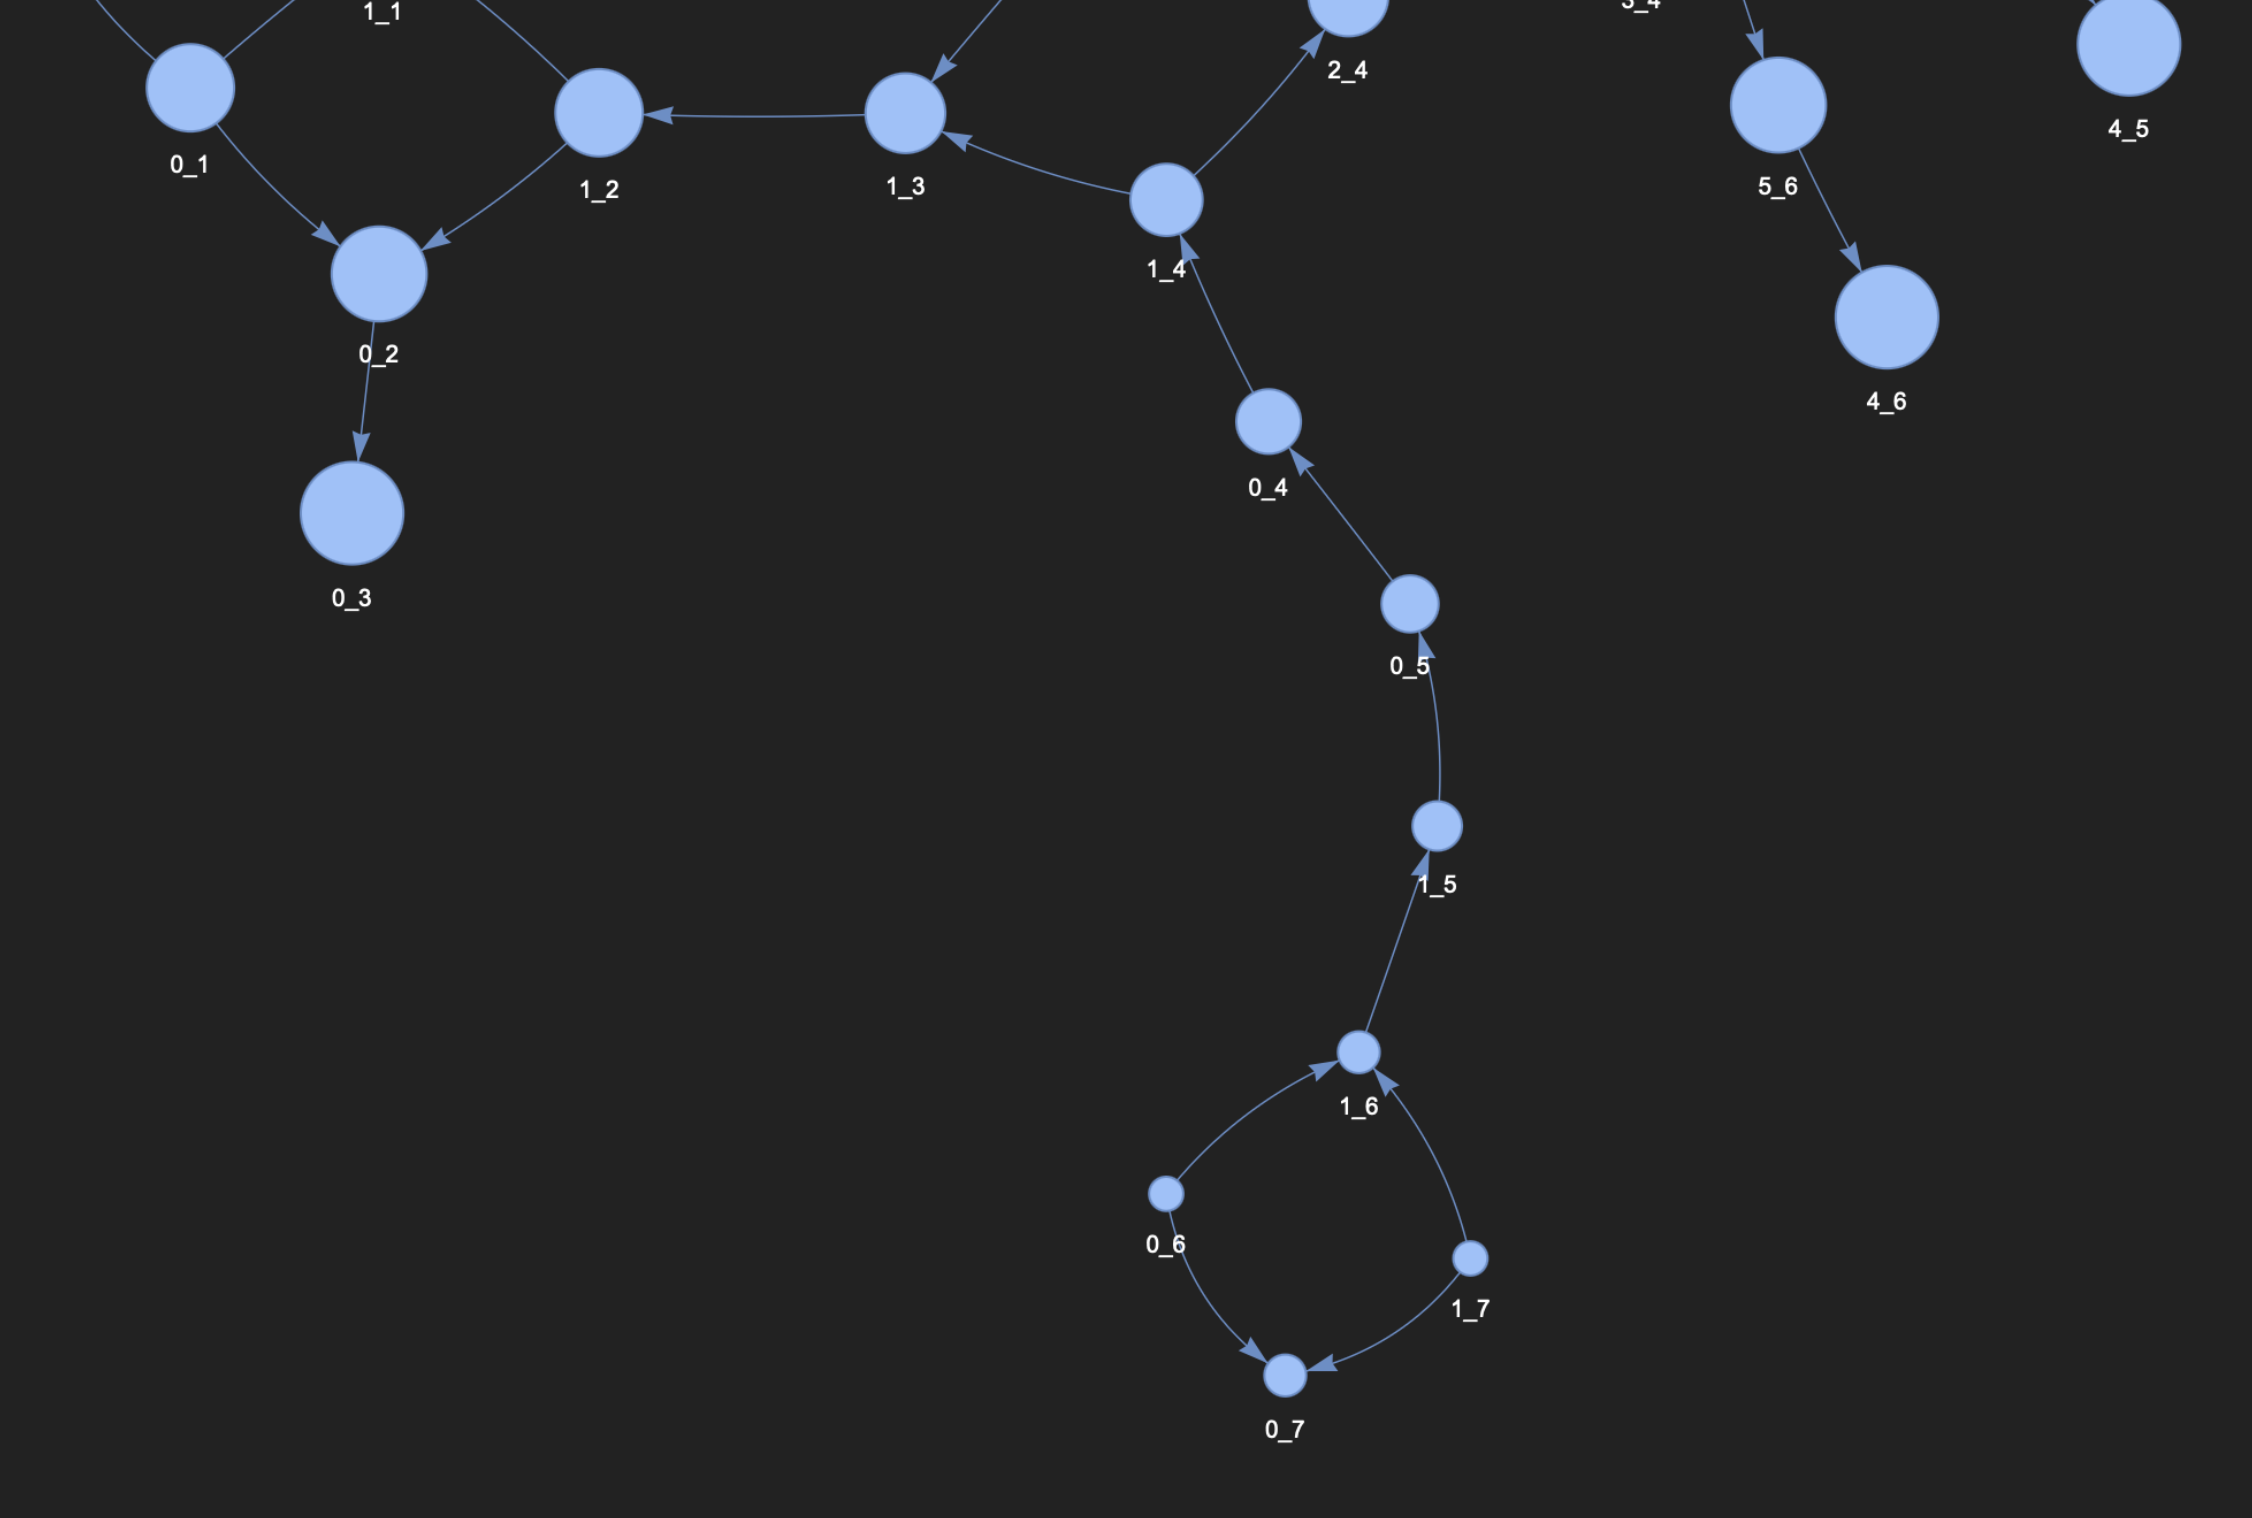

In [5]:
# 36

result = 0

for th in trailhead:
    trails = nx.single_source_dijkstra_path(G, f'{th[0]}_{th[1]}')
    result = result + len( [t for t in trails if len(trails[t])==10] )
    
result 

36

In [6]:
nt = Network(height='1000px', width='100%', bgcolor="#222222", font_color="white", select_menu=True, directed=True, filter_menu=True, ) 
nt.from_nx(G)
nt.show('day_10_1.html', notebook=False)

day_10_1.html


## Input file

In [7]:
fp = '../data/day_10_1.txt'

with open(fp, 'r') as f_in:
   island_map_input = f_in.readlines()

island_map = [ [int(j) for j in list(i.strip())]  for i in island_map_input ]
#island_map

In [8]:
G = nx.DiGraph()
trailhead = list() 

for x in range(len(island_map[0])):
    for y in range(len(island_map)):
        src_node = island_map[y][x]
        
        if src_node == 0: trailhead.append( (x, y) )
        G.add_node(f'{x}_{y}', title=f'{x}_{y}', )
        
        if y > 0:
            tgt_node = island_map[y-1][x]
            if tgt_node == src_node + 1: 
                G.add_node(f'{x}_{y-1}', title=f'{x}_{y-1}', )
                G.add_edge(f'{x}_{y}', f'{x}_{y-1}')
        if x < len(island_map[0])-1: 
            tgt_node = island_map[y][x+1]
            if tgt_node == src_node + 1: 
                G.add_node(f'{x+1}_{y}', title=f'{x+1}_{y}', )
                G.add_edge(f'{x}_{y}', f'{x+1}_{y}')
        if y < len(island_map)-1: 
            tgt_node = island_map[y+1][x]
            if tgt_node == src_node + 1: 
                G.add_node(f'{x}_{y+1}', title=f'{x}_{y+1}', )
                G.add_edge(f'{x}_{y}', f'{x}_{y+1}')
        if x > 0:
            tgt_node = island_map[y][x-1]
            if tgt_node == src_node + 1: 
                G.add_node(f'{x-1}_{y}', title=f'{x-1}_{y}',)
                G.add_edge(f'{x}_{y}', f'{x-1}_{y}')

In [9]:
# 644 

result = 0

for th in trailhead:
    trails = nx.single_source_dijkstra_path(G, f'{th[0]}_{th[1]}')
    result = result + len( [t for t in trails if len(trails[t])==10] )
    
result

644

In [10]:
nt = Network(height='1000px', width='100%', bgcolor="#222222", font_color="white", select_menu=True, directed=True, filter_menu=True) 
nt.from_nx(G)
#nt.show('day_10_1.html', notebook=False)

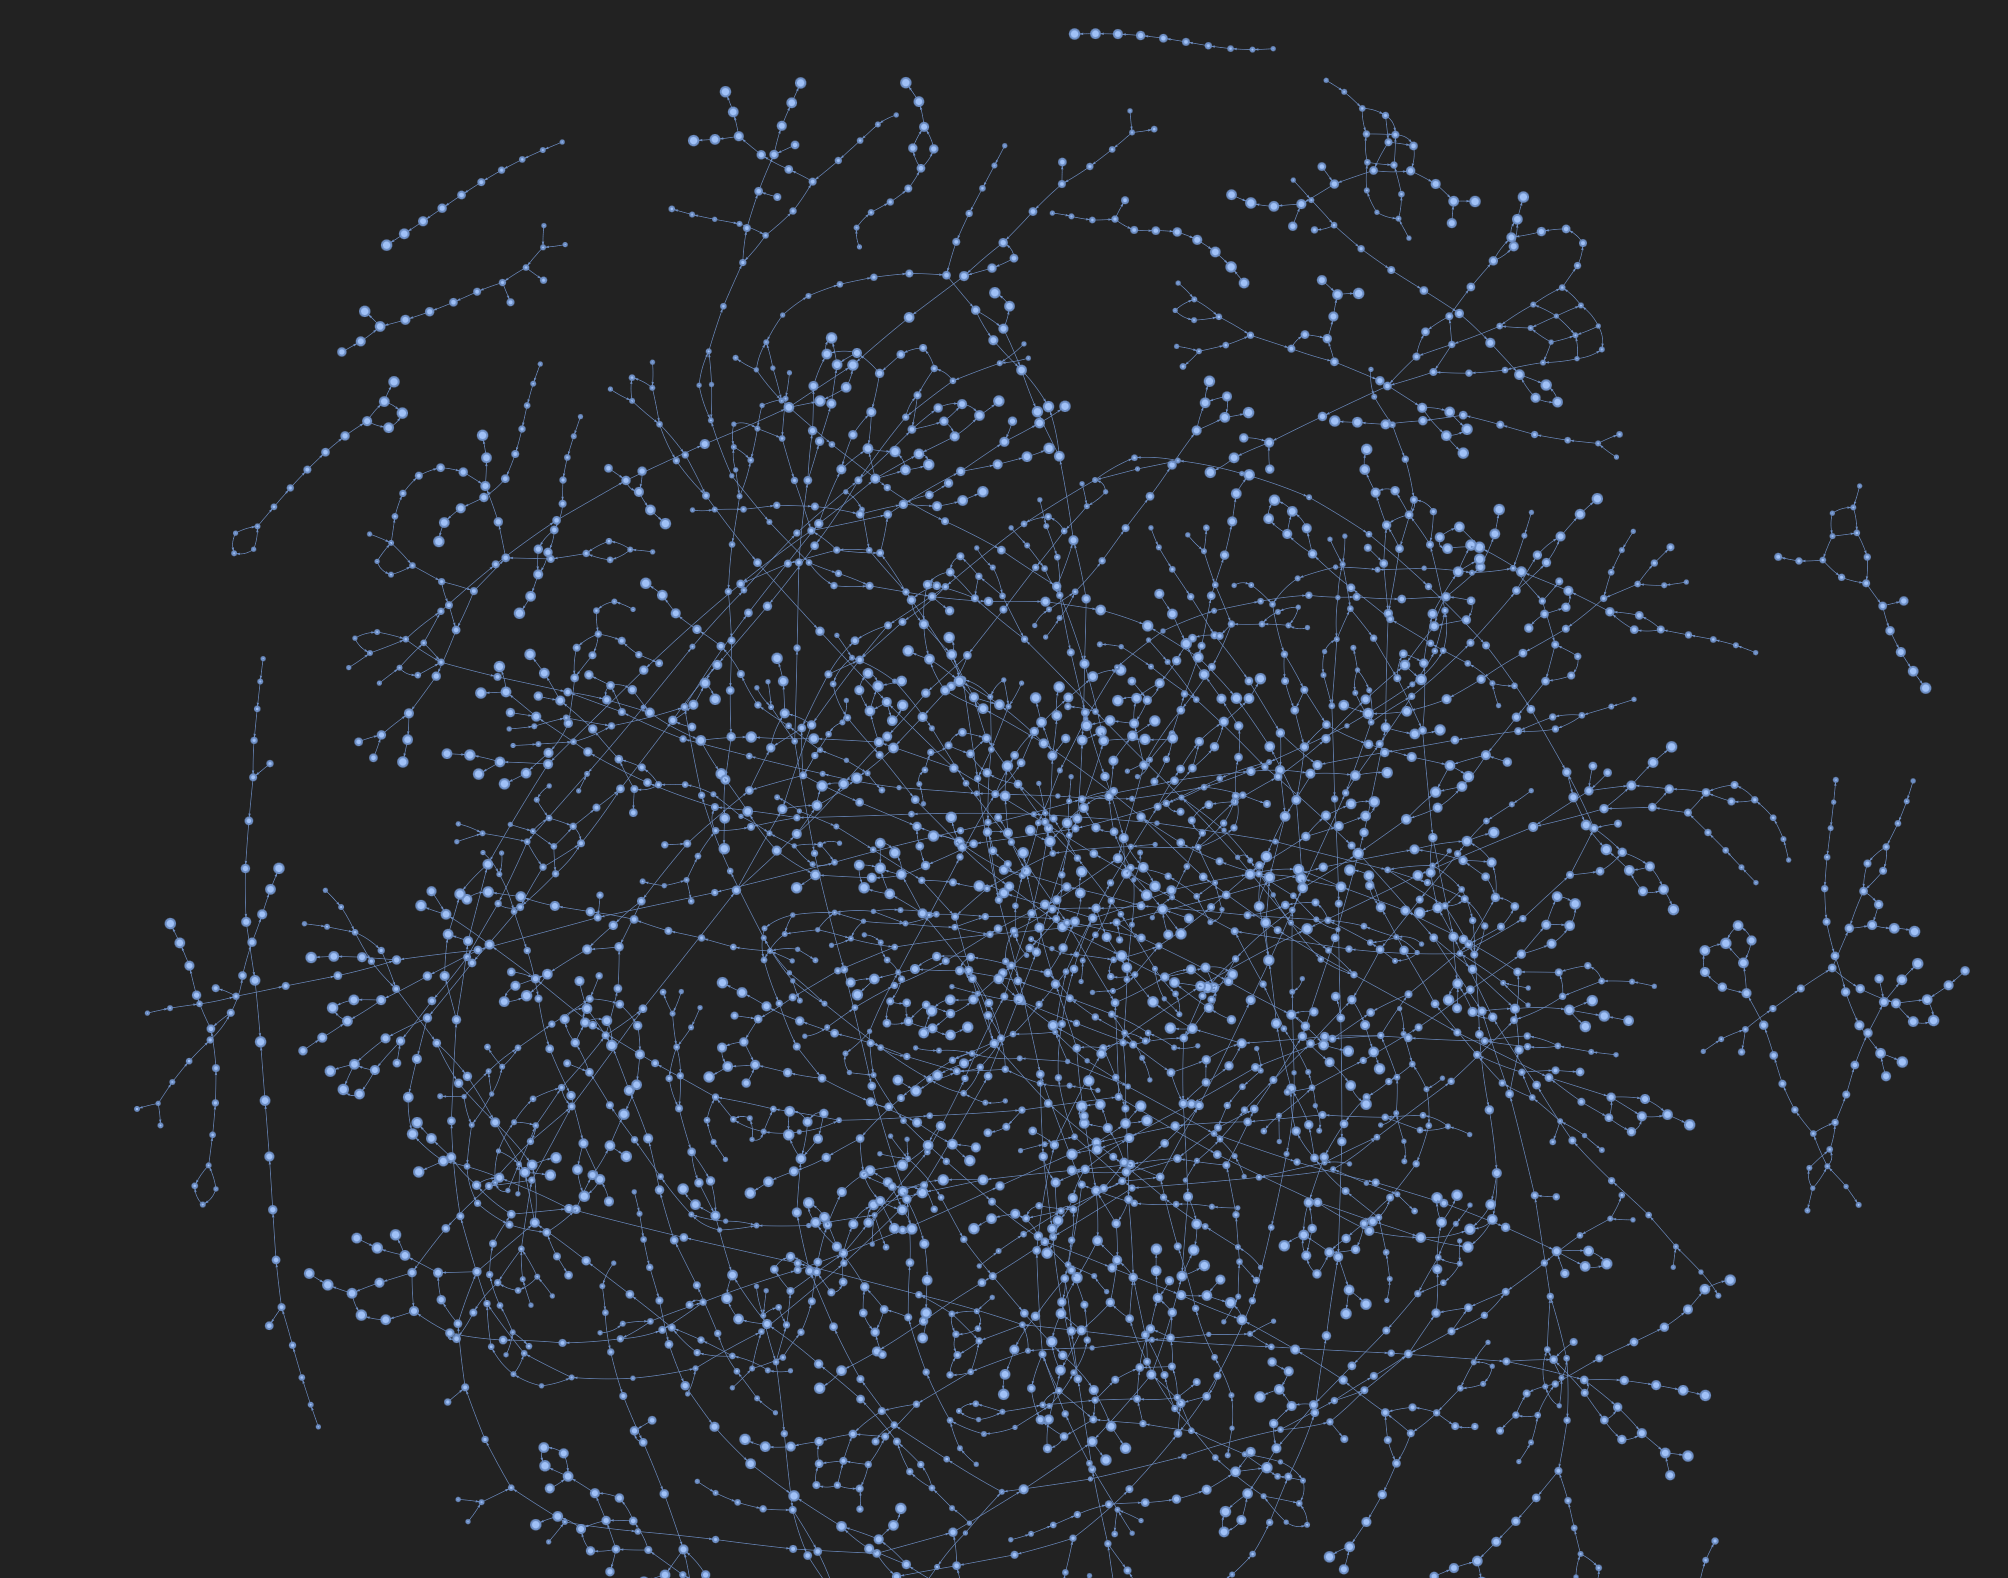